In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

In [322]:
np.random.seed(42)
data = {
    "Umur": [15, 22, 28, 35, 40, 19, 50, 45, np.nan, 30, 25, 60, np.nan, 33, 27, 15, 22, 28, 35, 40, 19, 50, 45, np.nan, 30, 25, 60, np.nan, 33, 27],
    "Gaji": [2000, 3500, 5000, 7000, 10000, 2500, 12000, np.nan, 4000, 6500, 3200, 15000, 8000, np.nan, 4500,2000, 3500, 5000, 7000, 10000, 2500, 12000, np.nan, 4000, 6500, 3200, 15000, 8000, np.nan, 4500],
    "Pendidikan": ["SMA", "S1", "S1", "S2", "S2", "SMA", "S3", "S2", "S1", "S2", "SMA", "S3", "S1", "S2", "S1", "SMA", "S1", "S1", "S2", "S2", "SMA", "S3", "S2", "S1", "S2", "SMA", "S3", "S1", "S2", "S1"],
    "Status": ["Belum Menikah", "Belum Menikah", "Menikah", "Menikah", "Menikah", 
               "Belum Menikah", "Menikah", "Menikah", "Belum Menikah", "Menikah",
               "Belum Menikah", "Menikah", "Menikah", "Menikah", "Belum Menikah", 
               "Belum Menikah", "Belum Menikah", "Menikah", "Menikah", "Menikah", 
               "Belum Menikah", "Menikah", "Menikah", "Belum Menikah", "Menikah",
               "Belum Menikah", "Menikah", "Menikah", "Menikah", "Belum Menikah"],
    "Main_Game": ["Ya", "Ya", "Ya", "Tidak", "Tidak", "Ya", "Tidak", "Tidak", "Ya", "Tidak",
                  "Ya", "Tidak", "Tidak", "Tidak", "Tidak", "Ya", "Ya", "Ya", "Tidak", "Tidak", "Ya", "Tidak", "Tidak", "Ya", "Tidak",
                  "Ya", "Tidak", "Tidak", "Tidak", "Tidak"]
}

df = pd.DataFrame(data)
df.head(10)

,Umur,Gaji,Pendidikan,Status,Main_Game
0,15.0,2000.0,SMA,Belum Menikah,Ya
1,22.0,3500.0,S1,Belum Menikah,Ya
2,28.0,5000.0,S1,Menikah,Ya
3,35.0,7000.0,S2,Menikah,Tidak
4,40.0,10000.0,S2,Menikah,Tidak
5,19.0,2500.0,SMA,Belum Menikah,Ya
6,50.0,12000.0,S3,Menikah,Tidak
7,45.0,NaN,S2,Menikah,Tidak
8,NaN,4000.0,S1,Belum Menikah,Ya
9,30.0,6500.0,S2,Menikah,Tidak


In [323]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].index

In [324]:
numeric_features = df[missing_values].select_dtypes(include=["number"]).columns

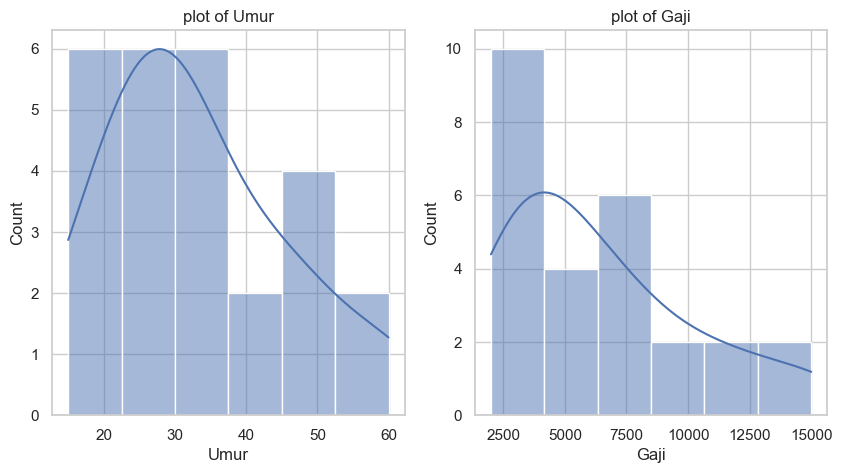

In [325]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numeric_features):
    plt.subplot(1,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"plot of {col}")



In [326]:
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
missing_values = df.isnull().sum()
missing_values


Umur          0
Gaji          0
Pendidikan    0
Status        0
Main_Game     0
dtype: int64

In [327]:
from sdv.single_table import ctgan  # huruf kecil!

# Buat instance CTGAN
model = ctgan.CTGAN(epochs=500)

# Fit ke data
model.fit(df, discrete_columns=["Pendidikan", "Status", "Main_Game"])

# Generate data sintetis
synthetic_data = model.sample(200)
print(synthetic_data.head())


        Umur         Gaji Pendidikan         Status Main_Game
0  16.939327  2153.701298        SMA  Belum Menikah        Ya
1   0.592139 -1588.890069        SMA  Belum Menikah        Ya
2  46.681570  2349.203995         S2        Menikah     Tidak
3  17.768114   600.051627         S1  Belum Menikah     Tidak
4  51.902063  4852.069125         S1        Menikah     Tidak


In [328]:
synthetic_data.describe(include="all")

df = synthetic_data

In [329]:
df["Main_Game"].value_counts()

Main_Game
Tidak    118
Ya        82
Name: count, dtype: int64

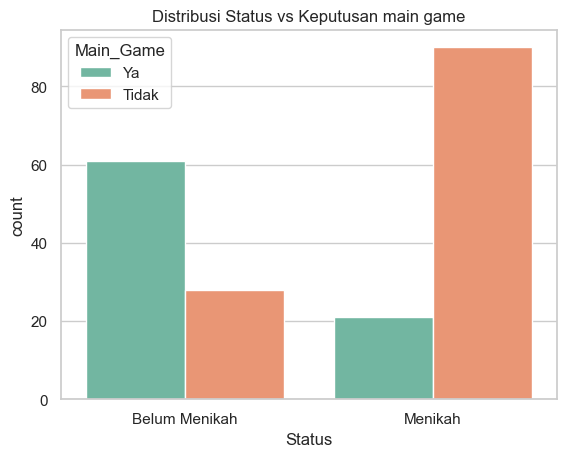

In [330]:
sns.countplot(x="Status", hue="Main_Game", data=df, palette="Set2")
plt.title("Distribusi Status vs Keputusan main game")
plt.show()


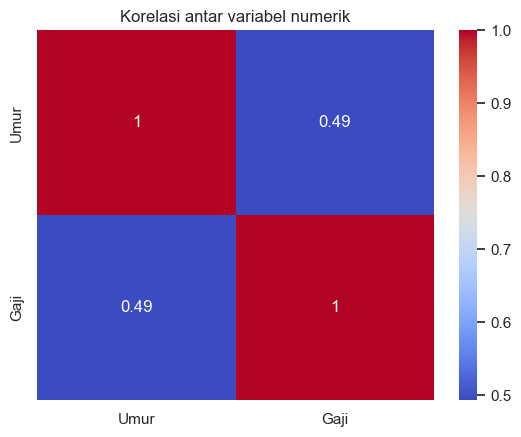

In [331]:
corr = df[["Umur", "Gaji"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasi antar variabel numerik")
plt.show()


<Axes: xlabel='Status', ylabel='count'>

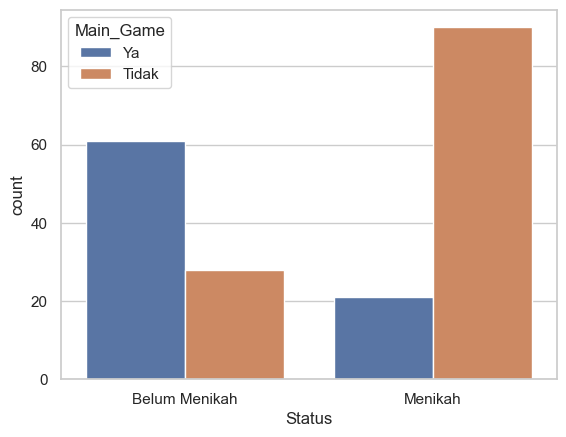

In [332]:
sns.countplot(x="Status", hue="Main_Game", data=df)

In [333]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorical_features = df.select_dtypes(include="object").columns
for col in kategorical_features:
    df[col] = le.fit_transform(df[col])

df

,Umur,Gaji,Pendidikan,Status,Main_Game
0,16.939327,2153.701298,3,0,1
1,0.592139,-1588.890069,3,0,1
2,46.681570,2349.203995,1,1,0
3,17.768114,600.051627,0,0,0
4,51.902063,4852.069125,0,1,0
...,...,...,...,...,...
195,41.786354,6283.018182,3,1,1
196,16.041433,2209.351985,0,0,1
197,51.766626,957.484810,2,1,0
198,73.860545,12367.327662,2,1,0


<Axes: xlabel='Status', ylabel='count'>

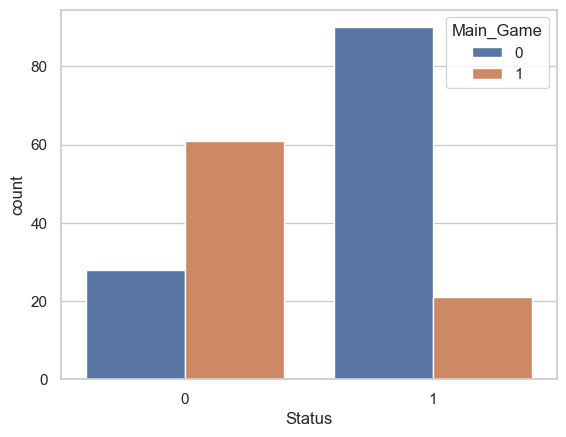

In [334]:
sns.countplot(x="Status", hue="Main_Game", data=df)


In [335]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Main_Game")
y = df["Main_Game"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 140
Test size: 60


In [336]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [337]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7166666666666667
Confusion Matrix:
 [[24  8]
 [ 9 19]]


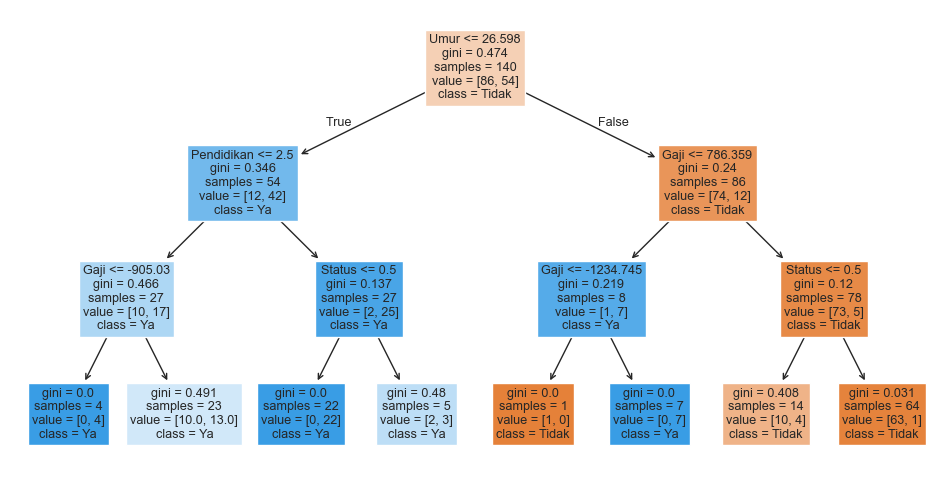

In [338]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(dt_model, feature_names=X.columns, class_names=["Tidak","Ya"], filled=True)
plt.show()
